# Actividad 5: Uso de software para búsqueda.

## Aaron Arath Alvarado Anzaldua

## 1951187

## Grupo 007 | Hora V1 5:00 Pm

Objetivo.-

Entrenar un modelo de Red Neuronal Prealimentada (tipo feedforward).

Comenzemos

---



Cargar librerias

"Tensorflow as tf" es la libreria para poder usar tensorflow


In [54]:
#Cargar librerias
import tensorflow as tf #Libreria de tensor flow y keras
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist


#Librerias de apoyo
import numpy as np
import matplotlib.pyplot as plt

#Importar el conjunto de datos de clasificación de dígitos MNIST

Este es un conjunto de datos de 60.000 imágenes en escala de grises de 28x28 de los 10 dígitos, junto con un conjunto de prueba de 10.000 imágenes.

In [55]:
#Cargar conjunto de datos
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)


Imprimir el conjunto de datos para ver con que estamos trabajando

In [56]:
#Analizar con que estamos trabajando
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

De esto podemos destacar que tenemos 10mil imagenes de prueba y 60mil imagenes de entrenamiento, asi como la resolucion de las fotos que es de 28x28 megapixeles, asi como el nombre de el conjunto, "test" es el nombre que se le asigno al conjunto de prueba, y "train" es el nombre que se le asigno al conjunto de entrenamiento


---


##Explorar datos
Otra forma de explorar que tipos de datos tenemos es la siguiente



In [58]:
#Separar datos


#Ver que nombres de las categorias
nombres_clases = metadatos.features['label'].names
print(nombres_clases)

#Ver que tipos de datos
train_images.shape


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


(60000, 28, 28)

De esto podemos destacar lo mismo que antes, las clases son 10 datos, con numeros del 1 al 9

Contamos con 60mil imagenes representada por 28x28 pixeles
y Cada etiqueta tiene un numero entre el 0 y el 9

In [59]:
#Nombre de las clases
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']


#Preprocesamiento de datos

Los datos se deben preprocesar antes de entrenar la red. Si inspecciona la primera imagen en el conjunto de entrenamiento, verá que los valores de los píxeles se encuentran entre 0 y 255:

In [60]:
#Convertir datos de 0 a 1
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que los datos tengan el formato correcto y que usted esté listo para generar y entrenar la red, mostraremos las primeras 25 imágenes del *conjunto de entrenamiento* con el nombre de la clase debajo de cada imagen.

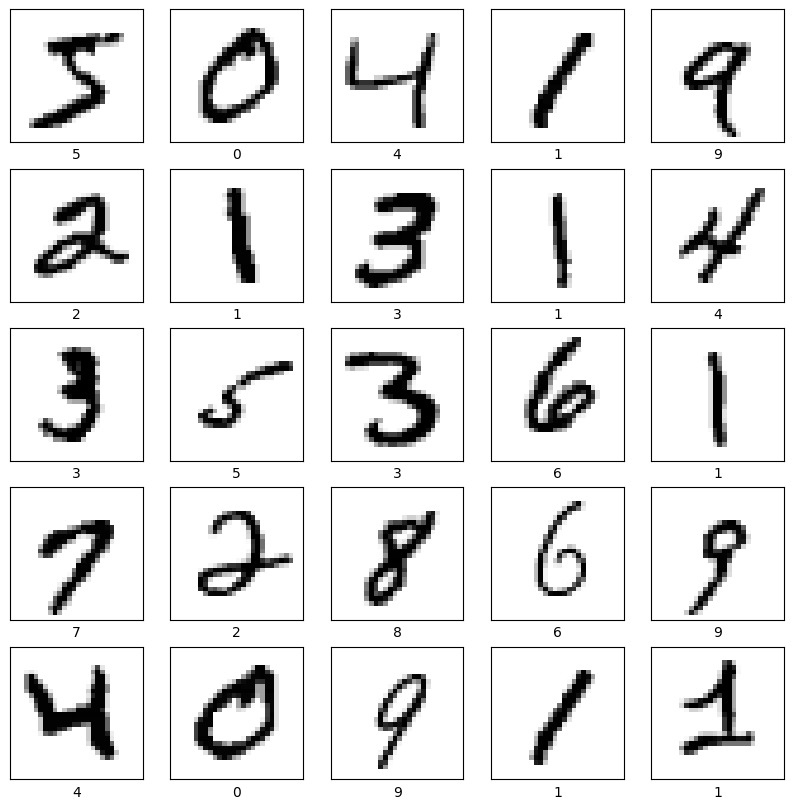

In [61]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Generar el modelo

La capa es el componente básico de una red neuronal. Las capas extraen las representaciones de los datos que les cargan. Se espera que dichas representaciones sean significativas para el problema en cuestión.

La mayor parte del aprendizaje profundo consiste en encadenar capas simples. La mayoría de las capas, como tf.keras.layers.Dense, tienen parámetros que se aprenden durante el entrenamiento.



In [62]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),#Blanco y negro, se aplasta a una sola capa con 784 neuronas donde ahi se alamacenas las neuronas
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

#Compilar el modelo

In [63]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo

In [64]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1429 - accuracy: 0.7277
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4768 - accuracy: 0.8750
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3775 - accuracy: 0.8954
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3377 - accuracy: 0.9047
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3150 - accuracy: 0.9094
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2989 - accuracy: 0.9136
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2865 - accuracy: 0.9178
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2756 - accuracy: 0.9207
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2662 - accuracy: 0.9227
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.256

#Evaluar precision


In [65]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2512 - accuracy: 0.9268 - 594ms/epoch - 2ms/step

Test accuracy: 0.926800012588501


#Hacer predicciones

In [66]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]
np.argmax(predictions[0])
test_labels[0]

313/313 [==============================] - 1s 2ms/step


7

In [67]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

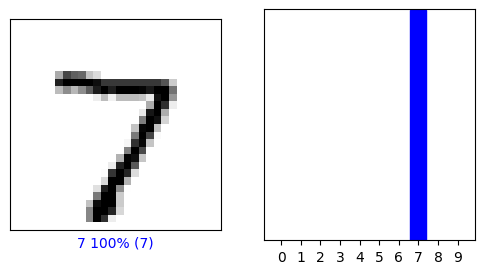

In [68]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

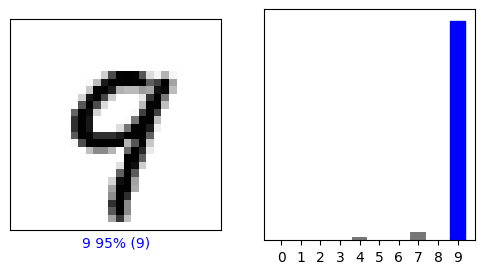

In [69]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

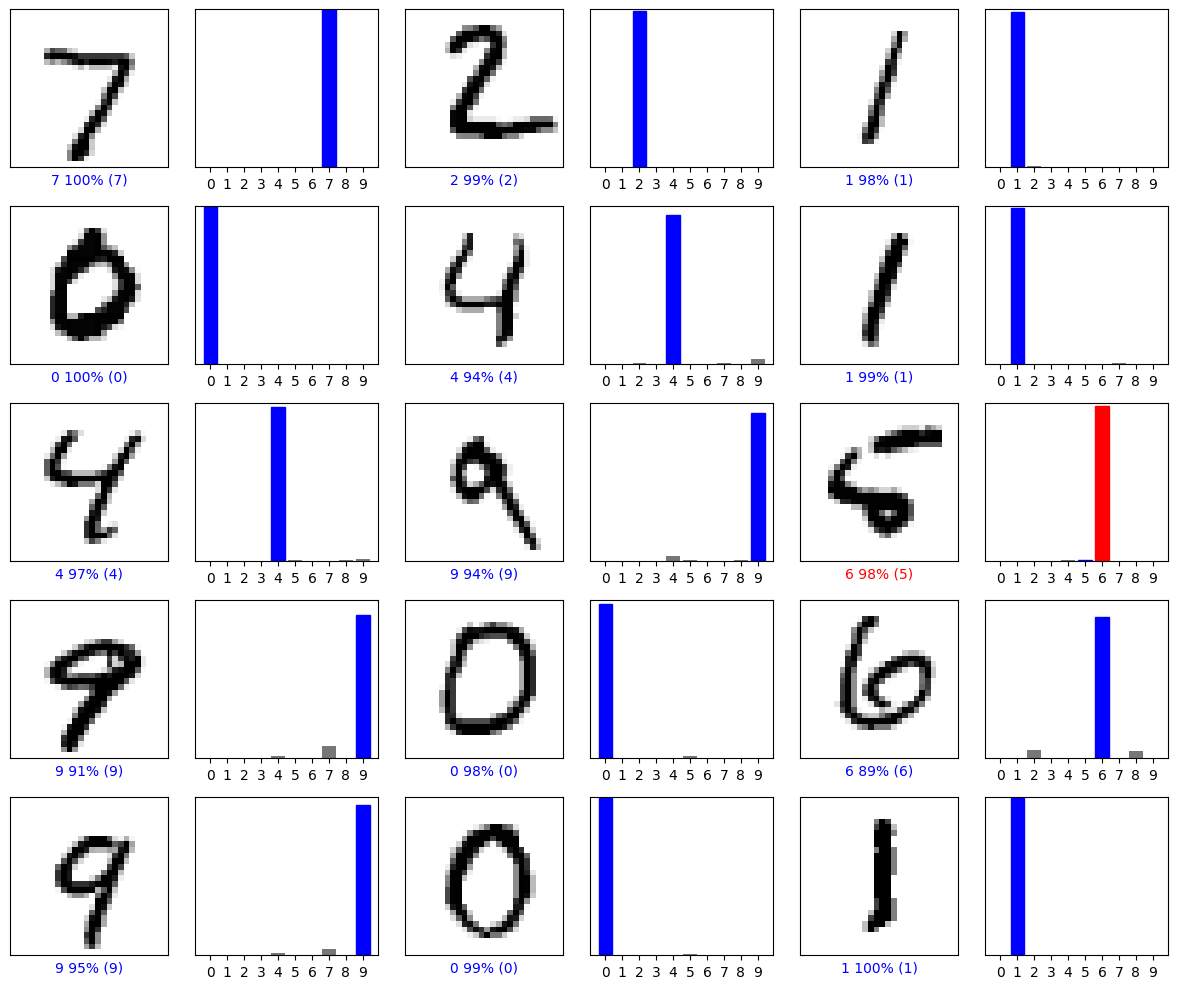

In [76]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Conclusion

Podemos Concluir que entrenamos bien la IA, con una precision del 92%.